# Proyecto de Analisis Factorial

Tutorial y desarrollo: https://www.datacamp.com/community/tutorials/introduction-factor-analysis

Para ello usaremos el data set **fbi** (https://www.personality-project.org/r/html/bfi.html)

FBI: 25 elementos de personalidad que representan 5 factores.
Se incluyeron 25 elementos de autoinforme de personalidad tomados del Fondo Internacional de Elementos de Personalidad (ipip.ori.org) como parte del proyecto de evaluación de la personalidad basado en la web Synthetic Aperture Personality Assessment (SAPA). Los datos de 2800 sujetos se incluyen aquí como un conjunto de demostración para la construcción de escalas, el análisis factorial y el análisis de la teoría de respuesta al ítem. También se incluyen tres variables demográficas adicionales (sexo, educación y edad).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from factor_analyzer import FactorAnalyzer
import numpy as np

Ahora cargamos todo el data set, mas sin embargo con solo poder observar los datos, ya se puedes descartar 4 columnas **gender,edication,age,Unnamed: 0**. Y tambien se quitaran los valores no existentes **'NaN'**

In [2]:
df = pd.read_csv("bfi.csv")
df

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67551,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,67552,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


In [3]:
df.drop(['gender', 'education', 'age','Unnamed: 0'],axis=1,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

In [4]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


Antes de empezar trabajar y hacer nuestros analisis. Primero debemos observar si quiera es posible hacer analisis factorial, para ello existen 2 metodos:

- Prueba de Bartlett para Sphericity
- Prueba de Kaiser-Meyer-Olkin

### Prueba de Bartlett para Sphericity

Bartlett compara su matriz de correlación (una matriz de correlaciones de Pearson) con la matriz de identidad. (Es decir, comprueba si existe una redundancia entre variables que se pueda resumir con algunos factores) [https://www.statisticshowto.com/bartletts-test/] [https://www.statology.org/bartletts-test-of-sphericity/ ] [https://stat.ethz.ch/pipermail/r-help/2011-June/281243.html#:~:text=The%20formula%20for%20the%20chi,)%2F2%20degrees%20of%20freedom. ]

La formula de Bartlett es:

$-(n - 1 - \frac{2p + 5}{6})ln(det(R))$, donde n es el número de observaciones, p es el número de variables y R es la matriz de correlación

### Prueba de Kaiser-Meyer-Olkin (KMO) 

La prueba de Kaiser-Meyer-Olkin (KMO) es una medida de cuán adecuados son sus datos para el análisis factorial. La prueba mide la adecuación del muestreo para cada variable en el modelo y para el modelo completo. La estadística es una medida de la proporción de varianza entre variables que podrían ser varianza común. Cuanto menor sea la proporción, más adecuados serán sus datos para el análisis factorial.

KMO devuelve valores entre 0 y 1. Una regla general para interpretar la estadística:

- Los valores de KMO entre 0,8 y 1 indican que el muestreo es adecuado
- Los valores de KMO inferiores a 0,6 indican que el muestreo no es adecuado y que se deben tomar medidas correctivas
- Los valores de KMO cercanos a cero significan que hay grandes correlaciones parciales en comparación con la suma de correlaciones. (En otras palabras, existen correlaciones generalizadas que constituyen un gran problema para el análisis factorial) 

The formula for the KMO test is:

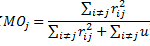 [https://www.statisticshowto.com/kaiser-meyer-olkin/ ] [https://en.wikipedia.org/wiki/Factor_analysis ]

## Usando metodo de Bartlett

En esta prueba de Bartlett, el valor p es 0. La prueba fue estadísticamente significativa, lo que indica que la matriz de correlación observada no es una matriz de identidad.

In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [6]:
chi_sv,p=calculate_bartlett_sphericity(df)
print("chi valor:",chi_sv)
print("p valor:",p)

chi valor: 18170.966350868883
p valor: 0.0


## Usando Kaiser-Meyer-Olkin (KMO)

Como el valor de KMO es mayor a 0.6 eso quiere decir que podemos seguir con nuestro analisis

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo
_,kmo_model=calculate_kmo(df)
print("KMO:",kmo_model)

KMO: 0.8485397221949231


## Escogiendo el numero de factores

Hay varios metodos para poder tener un criterio al momento de escoger el numero de factores. Estan entre:

- Horn's parallel analysis
- Velicer's MAP test
- Kaiser criterion
- Scree plot

**Horn's parallel analysis** y **Velicer's MAP test** podriamos decir que son los mas "modernos" mas sin embargo para este proyecto usaremos los viejos metodos, Kaiser criterion y Scree plot. [https://en.wikipedia.org/wiki/Factor_analysis ]

## Aplicando Kaiser criterion y Scree plot

Al aplicar Kaiser criterion y Scree plot podemos observar que solo 6 de los 25 factores son mayores a 1, por lo tanto ya tenemos una idea de que aproximadamente 6 factores es buena o muy buena eleccion. Pero al momento de hacer Scree plot podemos observar justo en la linea roja que hay como una caida, bueno gracias al metodo del codo (usado en K-means) nos podemos dar una idea de que tal vez 6 factores sea el indicado (OJO, solo lo uso como un recordatorio y que se parecen bastantes estos metodos al momento de escoger un valor). Asi que se usara 6 factores con varimax

In [8]:
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation=None) #25=nums de columnas del data set df
fa.fit(df)
ev, v = fa.get_eigenvalues()

print("ev original:",ev)
print("ev > 1", ev[ev>1])

ev original: [5.13431118 2.75188667 2.14270195 1.85232761 1.54816285 1.07358247
 0.83953893 0.79920618 0.71898919 0.68808879 0.67637336 0.65179984
 0.62325295 0.59656284 0.56309083 0.54330533 0.51451752 0.49450315
 0.48263952 0.448921   0.42336611 0.40067145 0.38780448 0.38185679
 0.26253902]
ev > 1 [5.13431118 2.75188667 2.14270195 1.85232761 1.54816285 1.07358247]


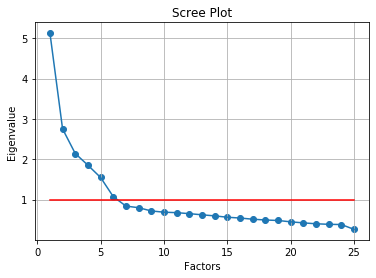

In [9]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),[1 for _ in range(df.shape[1])],"r")
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Ahora vamos a ver que en realidad en el 6to factor no tiene buenos factor.loadings_ en ninguna variable ya que se repite con factor5, por lo que, tocará probar con 5 factores

In [10]:
fa = FactorAnalyzer()
fa.set_params(n_factors=6, rotation="varimax")
fa.fit(df)
new_df = pd.DataFrame(fa.loadings_)
new_df.columns = ["factor"+str(i+1) for i in range(6)]
for k,i in enumerate(new_df):
    print("Filas donde factor"+str(k+1)+" tiene factor.loadings_ mas altos")
    _max = [0,0]
    for s in range(5):
        if np.mean(np.abs(new_df[i][s*5:(s+1)*5])) > _max[0]:
            _max[0] = np.mean(np.abs(new_df[i][s*5:(s+1)*5]))
            _max[1] = s
    print(new_df[i][_max[1]*5:(_max[1]+1)*5])
    print()

Filas donde factor1 tiene factor.loadings_ mas altos
15    0.805806
16    0.789832
17    0.725081
18    0.578319
19    0.523097
Name: factor1, dtype: float64

Filas donde factor2 tiene factor.loadings_ mas altos
10   -0.590451
11   -0.684578
12    0.556774
13    0.658395
14    0.507535
Name: factor2, dtype: float64

Filas donde factor3 tiene factor.loadings_ mas altos
5    0.554582
6    0.674545
7    0.551164
8   -0.638475
9   -0.544838
Name: factor3, dtype: float64

Filas donde factor4 tiene factor.loadings_ mas altos
0   -0.530987
1    0.661141
2    0.605933
3    0.404594
4    0.469698
Name: factor4, dtype: float64

Filas donde factor5 tiene factor.loadings_ mas altos
20    0.479477
21   -0.496640
22    0.566128
23    0.349227
24   -0.576743
Name: factor5, dtype: float64

Filas donde factor6 tiene factor.loadings_ mas altos
20    0.218690
21    0.134693
22    0.210777
23    0.178068
24    0.135936
Name: factor6, dtype: float64



In [11]:
fa = FactorAnalyzer()
fa.set_params(n_factors=5, rotation="varimax",)
fa.fit(df)
new_df = pd.DataFrame(fa.loadings_)
new_df.columns = ["factor"+str(i+1) for i in range(5)]
for k,i in enumerate(new_df):
    print("Filas donde factor"+str(k+1)+" tiene factor.loadings_ mas altos")
    _max = [0,0]
    for s in range(5):
        if np.mean(np.abs(new_df[i][s*5:(s+1)*5])) > _max[0]:
            _max[0] = np.mean(np.abs(new_df[i][s*5:(s+1)*5]))
            _max[1] = s
    print(new_df[i][_max[1]*5:(_max[1]+1)*5])
    print()

Filas donde factor1 tiene factor.loadings_ mas altos
15    0.786807
16    0.754109
17    0.731721
18    0.590602
19    0.537858
Name: factor1, dtype: float64

Filas donde factor2 tiene factor.loadings_ mas altos
10   -0.574835
11   -0.678731
12    0.536816
13    0.646833
14    0.504069
Name: factor2, dtype: float64

Filas donde factor3 tiene factor.loadings_ mas altos
5    0.545824
6    0.648731
7    0.557036
8   -0.633806
9   -0.562467
Name: factor3, dtype: float64

Filas donde factor4 tiene factor.loadings_ mas altos
0   -0.428166
1    0.626946
2    0.650743
3    0.435624
4    0.537087
Name: factor4, dtype: float64

Filas donde factor5 tiene factor.loadings_ mas altos
20    0.504907
21   -0.468925
22    0.596007
23    0.369012
24   -0.533778
Name: factor5, dtype: float64



In [12]:
final_df = pd.DataFrame(fa.get_factor_variance())
final_df.columns = ["factor"+str(i+1) for i in range(5)]
final_df.index = ["SS Loadings","Proportion Var","Cumulative Var"]
final_df

,factor1,factor2,factor3,factor4,factor5
SS Loadings,2.709633,2.473090,2.041106,1.844498,1.522153
Proportion Var,0.108385,0.098924,0.081644,0.073780,0.060886
Cumulative Var,0.108385,0.207309,0.288953,0.362733,0.423619


### Varianza total acumulada del 42.36% explicada por los 5 factores

Bueno eso es usando varimax, ahora probaremos maxima verosimilitud, pero otra vez se repite lo mismo de que el 6to factor sobra. Por lo que otra vez se reducirá a 5 factores

In [13]:
fa = FactorAnalyzer()
fa.set_params(n_factors=6, rotation="varimax",method="ml",)
fa.fit(df)
new_df = pd.DataFrame(fa.loadings_)
new_df.columns = ["factor"+str(i+1) for i in range(6)]
for k,i in enumerate(new_df):
    print("Filas donde factor"+str(k+1)+" tiene factor.loadings_ mas altos")
    _max = [0,0]
    for s in range(5):
        if np.mean(np.abs(new_df[i][s*5:(s+1)*5])) > _max[0]:
            _max[0] = np.mean(np.abs(new_df[i][s*5:(s+1)*5]))
            _max[1] = s
    print(new_df[i][_max[1]*5:(_max[1]+1)*5])
    print()

Filas donde factor1 tiene factor.loadings_ mas altos
15    0.819387
16    0.805240
17    0.710117
18    0.561015
19    0.512293
Name: factor1, dtype: float64

Filas donde factor2 tiene factor.loadings_ mas altos
10   -0.583211
11   -0.674196
12    0.565775
13    0.673769
14    0.505751
Name: factor2, dtype: float64

Filas donde factor3 tiene factor.loadings_ mas altos
5    0.557406
6    0.676641
7    0.548303
8   -0.637689
9   -0.546376
Name: factor3, dtype: float64

Filas donde factor4 tiene factor.loadings_ mas altos
0   -0.529990
1    0.662561
2    0.600602
3    0.400879
4    0.460812
Name: factor4, dtype: float64

Filas donde factor5 tiene factor.loadings_ mas altos
20    0.483487
21   -0.493920
22    0.571673
23    0.352142
24   -0.572293
Name: factor5, dtype: float64

Filas donde factor6 tiene factor.loadings_ mas altos
20    0.180795
21    0.136742
22    0.192632
23    0.176743
24    0.146478
Name: factor6, dtype: float64



In [14]:
fa = FactorAnalyzer()
fa.set_params(n_factors=5, rotation="varimax",method="ml")
fa.fit(df)
new_df = pd.DataFrame(fa.loadings_)
new_df.columns = ["factor"+str(i+1) for i in range(5)]
for k,i in enumerate(new_df):
    print("Filas donde factor"+str(k+1)+" tiene factor.loadings_ mas altos")
    _max = [0,0]
    for s in range(5):
        if np.mean(np.abs(new_df[i][s*5:(s+1)*5])) > _max[0]:
            _max[0] = np.mean(np.abs(new_df[i][s*5:(s+1)*5]))
            _max[1] = s
    print(new_df[i][_max[1]*5:(_max[1]+1)*5])
    print()

Filas donde factor1 tiene factor.loadings_ mas altos
15    0.816037
16    0.787141
17    0.713552
18    0.562340
19    0.517724
Name: factor1, dtype: float64

Filas donde factor2 tiene factor.loadings_ mas altos
10   -0.587271
11   -0.673957
12    0.489939
13    0.613380
14    0.490651
Name: factor2, dtype: float64

Filas donde factor3 tiene factor.loadings_ mas altos
5    0.533456
6    0.624362
7    0.553893
8   -0.653227
9   -0.573371
Name: factor3, dtype: float64

Filas donde factor4 tiene factor.loadings_ mas altos
0   -0.392899
1    0.601308
2    0.662309
3    0.453899
4    0.580284
Name: factor4, dtype: float64

Filas donde factor5 tiene factor.loadings_ mas altos
20    0.523620
21   -0.453912
22    0.614273
23    0.368373
24   -0.511864
Name: factor5, dtype: float64



In [15]:
final_df = pd.DataFrame(fa.get_factor_variance())
final_df.columns = ["factor"+str(i+1) for i in range(5)]
final_df.index = ["SS Loadings","Proportion Var","Cumulative Var"]
final_df

,factor1,factor2,factor3,factor4,factor5
SS Loadings,2.687054,2.319614,2.033578,1.978013,1.556714
Proportion Var,0.107482,0.092785,0.081343,0.079121,0.062269
Cumulative Var,0.107482,0.200267,0.281610,0.360730,0.422999


### Varianza total acumulada del 42.29% explicada por los 5 factores